# 1. Linear SVM

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data1 = sio.loadmat('./data/ex6data1.mat')

In [16]:
data1['X'][:,0].shape

(51,)

In [17]:
data_df = pd.DataFrame({'X1':data1['X'][:,0],'X2':data1['X'][:,1],'y':data1['y'].flatten()})
data_df.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


## visualize Data

In [20]:
#data_df[data_df['y']==1].X1

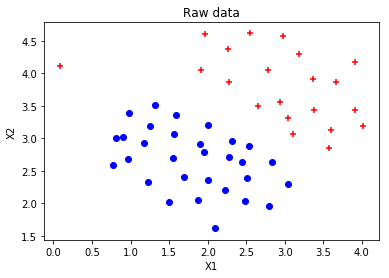

In [21]:
plt.scatter(data_df[data_df['y'] ==1].X1, data_df[data_df['y']==1].X2,c = 'r',marker='+' )
plt.scatter(data_df[data_df['y']==0].X1, data_df[data_df['y']==0].X2, c = 'b',marker = 'o')
plt.title('Raw data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [32]:
from sklearn import svm
svc1 = svm.LinearSVC(C=1,loss = 'hinge')
svc1.fit(data_df[['X1','X2']], data_df['y'])
svc1.score(data_df[['X1','X2']],data_df['y'])

0.98039215686274506

In [33]:
data_df['SVM1 Confidence'] = svc1.decision_function(data_df[['X1', 'X2']])

Text(0.5,1,'SVM (C=1) Decision Confidence')

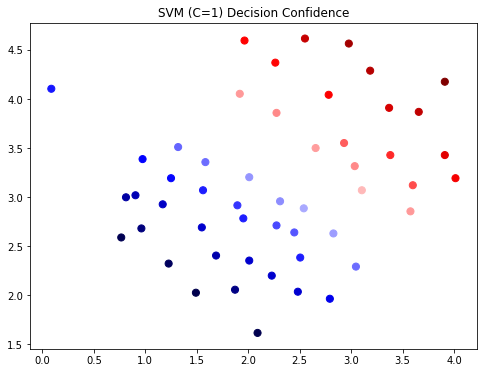

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data_df['X1'], data_df['X2'], s=50, c=data_df['SVM1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

In [29]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data_df[['X1', 'X2']], data_df['y'])
svc100.score(data_df[['X1', 'X2']], data_df['y'])

0.94117647058823528

In [30]:
data_df['SVM100 Confidence'] = svc100.decision_function(data_df[['X1', 'X2']])

Text(0.5,1,'SVM (C=1) Decision Confidence')

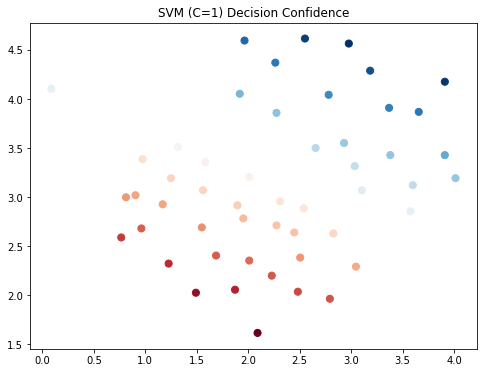

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data_df['X1'], data_df['X2'], s=50, c=data_df['SVM100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')

In [37]:
data_df.head()

,X1,X2,y,SVM1 Confidence,SVM100 Confidence
0,1.9643,4.5957,1,0.805283,3.102607
1,2.2753,3.8589,1,0.386921,1.237224
2,2.9781,4.5651,1,1.380422,4.095270
3,2.9320,3.5519,1,0.524652,1.023567
4,3.5772,2.8560,1,0.337578,-0.362487


## 使用一个高斯核函数 Guassian kernel

In [44]:
def gaussianKernel(x1,x2, sigma):
    return np.exp(-np.power(x1-x2,2).sum()/(2* (sigma**2)))

In [45]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

## Example Data 2

In [47]:
data_2 = sio.loadmat('./data/ex6data2.mat')

In [48]:
df_2 = pd.DataFrame(data_2['X'], columns = ['X1','X2'])

In [49]:
df_2['y'] = data_2['y']

In [50]:
df_2.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [53]:
pot_1 =df_2[df_2['y'] ==1]
pot_0 = df_2[df_2['y']==0]

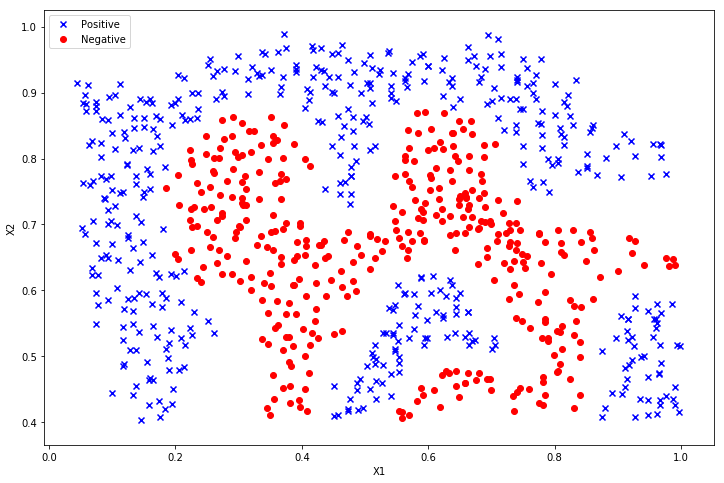

In [56]:
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(pot_1.X1,pot_1.X2, c = 'b',marker = 'x', label = 'Positive')
ax.scatter(pot_0.X1,pot_0.X2, c = 'r', marker = 'o', label = 'Negative')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.legend(loc =2)
plt.show()

In [57]:
svc = svm.SVC(C = 100, gamma = 10,probability = True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
svc.fit(df_2[['X1','X2']], df_2['y'])
svc.score(df_2[['X1','X2']], df_2['y'])

0.9698725376593279

In [61]:
df_2['Probability'] = svc.predict_proba(df_2[['X1','X2']])[:,0]

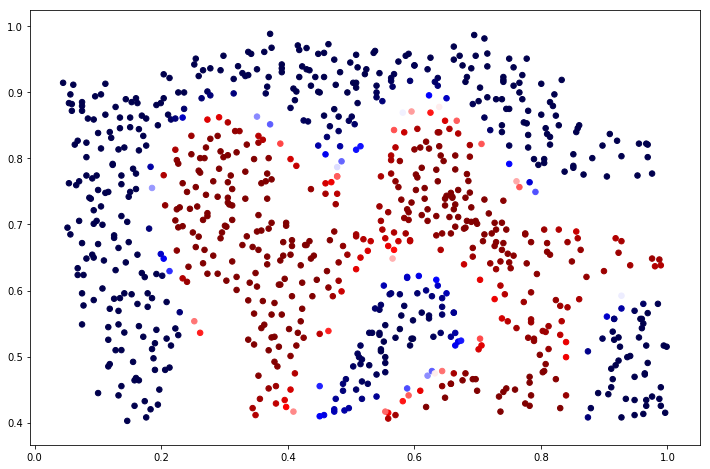

In [63]:

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df_2['X1'], df_2['X2'], s=30, c=df_2['Probability'], cmap='seismic')
plt.show()

In [67]:
raw_data = sio.loadmat('./data/ex6data3.mat')


In [68]:
X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

In [69]:

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.96499999999999997, {'C': 0.3, 'gamma': 100})

## spam classifier

In [79]:
vocab = pd.read_csv('./data/vocab.txt', delimiter='\t', names= ['number','voc'])

In [80]:
vocab.head()

,number,voc
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [84]:
spamtrain = sio.loadmat('./data/spamTrain')
spamtest = sio.loadmat('./data/spamTest')

In [87]:
Xtrain = spamtrain['X']
ytrain = spamtrain['y']
Xtest = spamtest['Xtest']
y_test = spamtest['ytest']

In [88]:
Xtrain.shape

(4000, 1899)

In [89]:
svc = svm.SVC()
svc.fit(Xtrain,ytrain)
svc.score(Xtrain,ytrain)

/Users/doumengge/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.94399999999999995

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
pred = svc.predict(Xtest)

In [92]:
from sklearn import metrics

In [94]:
print(metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97       692
          1       0.98      0.87      0.92       308

avg / total       0.95      0.95      0.95      1000

